In [8]:
import numpy as np
import matplotlib.pyplot as plt


### CONSTANTS
MS2KG = 1.98847e30
G = 6.67430e-11
Mstar = 13.048 #MSOL
Mstar_SI = Mstar*MS2KG
k_B = 1.380649e-23
amu = 1.66053904020e-27
AU2SI = 149597870700.0
RSOL2SI = 6.957e8
YR2S = 3.154e7
CM32M3 = 1.0e-6
CM22M2 = 1.0e-4
G2KG = 1.0e-3
CODE2MSOL = 13.048
Rgas = 8.31446261815324
StefBoltz = 5.670374419e-8
c_light = 299792458
Mdotcrit = 3e-8*(MS2KG/YR2S)
m_proton = 1.67262192e-27 #in kg
m_proton_cgs = m_proton*1e3 #in cgs
cross_thomp = 6.65e-29
cross_thomp_cgs = cross_thomp*1.0e4
DAYS2S = 86400

### DISC PARAMETERS
Rinnb = 8.7*RSOL2SI
Routnb = 31.5*RSOL2SI
Mdot = 2e-5*(MS2KG/YR2S)
Rstar = 5.987*RSOL2SI
BinPeriod = 12.9440*DAYS2S
alphae0 = 1.0
alphae1 = 0.1
alphae2 = 0.01
alphae3 = 0.001
alphae4 = 0.0001




#CO JE PODEZRELE?
# VR-profile BROZ2021
# Sigma profile BROZ 2021

## VISCOUS TIMESCALE

In [9]:
def t_visc_fromalpha(R,alpha,H,c_s):
#input: alpha, H-profile, cs-profile -> viscous timescale-profile 
    nu = alpha*H*c_s
    t_visc = R**2/nu
    return t_visc

def t_visc_fromVR(R,V_R):
#input: v_R-profile -> viscous timescale-profile 
    t_visc = R/np.abs(V_R)
    return t_visc

def t_cs_fromT(R,T,gamma,MMW):
    return R/(np.sqrt((gamma*k_B*T)/(amu*MMW)))

def t_dyn_K(R):
    result = 1./(np.sqrt(G*Mstar_SI/R**3))
    return result

def t_z(H,cs):
    tz = H/cs
    return tz

#####################################################################

def Omega_K(R):
    result = np.sqrt(G*Mstar_SI/R**3)
    return result

def cs_fromT(T,gamma,MMW):
    return np.sqrt((gamma*k_B*T)/(amu*MMW))    

def H(cs, OmegaK,h_cnb):               
    result = h_cnb*cs/OmegaK
    return result

######################################

def T_BROZ2021(R):
    Tnb = 30345 #Kelvins
    etmpnb = -0.73 
    result = Tnb*(R/Rinnb)**(etmpnb)
    return result

def VR_BROZ2021(R):
#Given for surface layers
    vnb = 112e3 #m/s
    evelnb = 1.91
    if R != Rinnb:
        vnb = 112e3 #m/s
        evelnb = 1.91
        result = vnb*(1-Rinnb/R)**(evelnb)
    else: result = vnb
    return result

def Sigma_BROZ2021(R):
    rhonb = 1.21e-9*(G2KG/CM32M3)
    edensnb = -0.57
    Tinnb = T_BROZ2021(Rinnb)
    csinnb = cs_fromT(Tinnb,gamma_BROZ2021,MMW_BROZ2021)
    OmegaKinnb = Omega_K(Rinnb)
    Hinnb = H(csinnb,OmegaKinnb,h_cnb_BROZ2021)
    sigmanb = rhonb*np.sqrt(2*np.pi)*Hinnb
    result = sigmanb*(R/Rinnb)**edensnb
    return result

######################################

def H_ShakSun(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    h = 1.2e4*alpha**(-1/10)*mdot**(1/5)*m**(9/10)*r**(21/20)*(1-r**(-1/2))**(1/5)
    return h/100.0


def T_ShakSun(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    T = 3.1e8*alpha**(-1/5)*mdot**(2/5)*m**(-1/5)*r**(-9/10)*(1-r**(-1/2))**(2/5)
    return T

def VR_ShakSun(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    vr = 2.0e6*alpha**(4/5)*mdot**(2/5)*m**(-1/5)*r**(-2/5)*(1-r**(-1/2))**(-3/5)
    return vr/100.0

####

def H_ShakSunBrem(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    h = 6.1e3*alpha**(-1/10)*mdot**(3/20)*m**(9/10)*r**(9/8)*(1-r**(-1/2))**(3/20)
    #h = 6.1e3*alpha**(-1/10)*mdot**(3/20)*m**(9/10)*r**(9/8)*(1-r**(-1/2))**(3/20)
    return h/100.0

def T_ShakSunBrem(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    T = 8.6e7*alpha**(-1/5)*mdot**(3/10)*m**(-1/5)*r**(-3/4)*(1-r**(-1/2))**(3/10)
    return T

def VR_ShakSunBrem(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    vr = 5.8e5*alpha**(4/5)*mdot**(3/10)*m**(-1/5)*r**(-1/4)*(1-r**(-1/2))**(-7/10)
    return vr/100.0

#######################################


def T_ShakSun_Prad(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    T = 2.3e7*alpha**(-1/4)*m**(-1/4)*r**(-3/4)
    return T

def VR_ShakSun_Prad(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    vr = 7.7e10*alpha*mdot**(2)*m*r**(-5/2)*(1-r**(-1/2))
    return vr/100.0

def H_ShakSun_Prad(R, OpT):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    h = (3./8*np.pi)*(OpT/c_light)*Mdot*(1-r**(-1/2))
    return h/100.0




def Op_T(R):
    nedivnp = 1
    m = m_proton
    cross = cross_thomp*1e4
    return nedivnp*cross/m





########################################

def VR_fromMdotSigma(R,Mdot,Sigma):
    VR = Mdot/(Sigma*2*np.pi*R)
    return VR


    

In [10]:
#BROZ ET AL. 2021 CLANEK
print("... ... ... ... ... ...")
MMW_BROZ2021 = (45*2+10*4)/(45+10)
gamma_BROZ2021 = 1.0
h_cnb_BROZ2021 = 3.8
print("MMW_BROZ2021=",MMW_BROZ2021)
print("gamma_BROZ2021=",gamma_BROZ2021)
print("h_cnb_BROZ2021",h_cnb_BROZ2021)

#T z BROZ ET AL. 2021 CLANEK, ale zmeneny gamma,MMW,h_cnb
print("... ... ... ... ... ...")
MMW_static = 0.5
gamma_static = 1.4
h_cnb_static = 1.0
print("MMW_static=",MMW_static)
print("gamma_static=",gamma_static)
print("h_cnb_static",h_cnb_static)


# WHERE?
RR = np.linspace(Rinnb,Routnb)

# Keplerian Omega
OmegaK = list(map(Omega_K,RR))

##########################################################
Tbroz = list(map(T_BROZ2021,RR))
##########################################################
#BROZ 2021
cs_BROZ2021 = list(map(lambda x : cs_fromT(x,gamma_BROZ2021,MMW_BROZ2021),Tbroz))
H_BROZ2021 = list(map(lambda x,y: H(x,y,h_cnb_BROZ2021),cs_BROZ2021,OmegaK)) 
alphae1 = 0.1
tnu_BROZ2021_alphae1 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae1,y,z)/YR2S,RR,H_BROZ2021,cs_BROZ2021))
alphae2 = 0.01
tnu_BROZ2021_alphae2 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae2,y,z)/YR2S,RR,H_BROZ2021,cs_BROZ2021))
alphae3 = 0.001
tnu_BROZ2021_alphae3 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae3,y,z)/YR2S,RR,H_BROZ2021,cs_BROZ2021))
########################################################
#static
cs_static = list(map(lambda x : cs_fromT(x,gamma_static,MMW_static),Tbroz))
H_static = list(map(lambda x,y: H(x,y,h_cnb_static),cs_static,OmegaK))
alphae1 = 0.1
tnu_static_alphae1 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae1,y,z)/YR2S,RR,H_static,cs_static))
alphae2 = 0.01
tnu_static_alphae2 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae2,y,z)/YR2S,RR,H_static,cs_static))
alphae3 = 0.001
tnu_static_alphae3 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae3,y,z)/YR2S,RR,H_static,cs_static))
#########################################################
#########################################################

#########################################################
#########################################################
vr_Broz2021 = list(map(VR_BROZ2021,RR))
tnu_BROZ2021_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_Broz2021))
#########################################################
#########################################################

#########################################################
#########################################################
#for Shakura Sunayev Thompson calculation gamma and MMW are used same as for static case.
alphae1_shaksun = 0.1
Hshaksun_alphae1 = list(map(lambda x: H_ShakSun(x,alphae1_shaksun),RR))
Tshaksun_alphae1 = list(map(lambda x: T_ShakSun(x,alphae1_shaksun),RR))
csshaksun_alphae1 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),Tshaksun_alphae1))
tnu_shaksun_alphae1 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae1_shaksun,y,z)/YR2S,RR,Hshaksun_alphae1,csshaksun_alphae1))
########################################################
alphae2_shaksun = 0.01
Hshaksun_alphae2 = list(map(lambda x: H_ShakSun(x,alphae2_shaksun),RR))
Tshaksun_alphae2 = list(map(lambda x: T_ShakSun(x,alphae2_shaksun),RR))
csshaksun_alphae2 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),Tshaksun_alphae2))
tnu_shaksun_alphae2 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae2_shaksun,y,z)/YR2S,RR,Hshaksun_alphae2,csshaksun_alphae2))
########################################################
alphae3_shaksun = 0.001
Hshaksun_alphae3 = list(map(lambda x: H_ShakSun(x,alphae3_shaksun),RR))
Tshaksun_alphae3 = list(map(lambda x: T_ShakSun(x,alphae3_shaksun),RR))
csshaksun_alphae3 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),Tshaksun_alphae3))
tnu_shaksun_alphae3 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae3_shaksun,y,z)/YR2S,RR,Hshaksun_alphae3,csshaksun_alphae3))
##########################################################
##########################################################

#########################################################
#########################################################
vr_shaksun_alphae1 = list(map(lambda x: VR_ShakSun(x,alphae1_shaksun),RR))
tnu_shaksun_alphae1_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksun_alphae1))
##########################################################
vr_shaksun_alphae2 = list(map(lambda x: VR_ShakSun(x,alphae2_shaksun),RR))
tnu_shaksun_alphae2_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksun_alphae2))
##########################################################
vr_shaksun_alphae3 = list(map(lambda x: VR_ShakSun(x,alphae3_shaksun),RR))
tnu_shaksun_alphae3_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksun_alphae3))
#########################################################
#########################################################

#########################################################
#########################################################
#for Shakura Sunayev Brem. calculation gamma and MMW are used same as for static case.
alphae1_shaksun = 0.1
HshaksunBrem_alphae1 = list(map(lambda x: H_ShakSunBrem(x,alphae1_shaksun),RR))
TshaksunBrem_alphae1 = list(map(lambda x: T_ShakSunBrem(x,alphae1_shaksun),RR))
csshaksunBrem_alphae1 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TshaksunBrem_alphae1))
tnu_shaksunBrem_alphae1 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae1_shaksun,y,z)/YR2S,RR,HshaksunBrem_alphae1,csshaksunBrem_alphae1))
########################################################
alphae2_shaksun = 0.01
HshaksunBrem_alphae2 = list(map(lambda x: H_ShakSunBrem(x,alphae2_shaksun),RR))
TshaksunBrem_alphae2 = list(map(lambda x: T_ShakSunBrem(x,alphae2_shaksun),RR))
csshaksunBrem_alphae2 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TshaksunBrem_alphae2))
tnu_shaksunBrem_alphae2 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae2_shaksun,y,z)/YR2S,RR,HshaksunBrem_alphae2,csshaksunBrem_alphae2))
########################################################
alphae3_shaksun = 0.001
HshaksunBrem_alphae3 = list(map(lambda x: H_ShakSunBrem(x,alphae3_shaksun),RR))
TshaksunBrem_alphae3 = list(map(lambda x: T_ShakSunBrem(x,alphae3_shaksun),RR))
csshaksunBrem_alphae3 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TshaksunBrem_alphae3))
tnu_shaksunBrem_alphae3 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae3_shaksun,y,z)/YR2S,RR,HshaksunBrem_alphae3,csshaksunBrem_alphae3))
##########################################################
##########################################################

#########################################################
#########################################################
vr_shaksunBrem_alphae1 = list(map(lambda x: VR_ShakSunBrem(x,alphae1_shaksun),RR))
tnu_shaksunBrem_alphae1_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksunBrem_alphae1))
##########################################################
vr_shaksunBrem_alphae2 = list(map(lambda x: VR_ShakSunBrem(x,alphae2_shaksun),RR))
tnu_shaksunBrem_alphae2_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksunBrem_alphae2))
##########################################################
vr_shaksunBrem_alphae3 = list(map(lambda x: VR_ShakSun(x,alphae3_shaksun),RR))
tnu_shaksunBrem_alphae3_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksunBrem_alphae3))
#########################################################
#########################################################

#########################################################
#########################################################
#for Shakura Sunayev PRAD. calculation gamma and MMW are used same as for static case.
OpT_ss_prad = list(map(Op_T,RR))
H_ss_prad = list(map(lambda x,y: H_ShakSun_Prad(x,y/10)/AU2SI,RR,OpT_ss_prad))


alphae1_shaksun = 0.1
TshaksunPrad_alphae1 = list(map(lambda x: T_ShakSun_Prad(x,alphae1_shaksun),RR))
csshaksunPrad_alphae1 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TshaksunPrad_alphae1))
tnu_shaksunPrad_alphae1 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae1_shaksun,y*AU2SI,z)/YR2S,RR,H_ss_prad,csshaksunPrad_alphae1))
########################################################
alphae2_shaksun = 0.01
TshaksunPrad_alphae2 = list(map(lambda x: T_ShakSun_Prad(x,alphae2_shaksun),RR))
csshaksunPrad_alphae2 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TshaksunPrad_alphae2))
tnu_shaksunPrad_alphae2 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae2_shaksun,y*AU2SI,z)/YR2S,RR,H_ss_prad,csshaksunPrad_alphae2))
########################################################
alphae3_shaksun = 0.001
TshaksunPrad_alphae3 = list(map(lambda x: T_ShakSun_Prad(x,alphae3_shaksun),RR))
csshaksunPrad_alphae3 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TshaksunPrad_alphae3))
tnu_shaksunPrad_alphae3 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae3_shaksun,y*AU2SI,z)/YR2S,RR,H_ss_prad,csshaksunPrad_alphae3))
##########################################################
##########################################################


#########################################################
#########################################################
vr_shaksunPrad_alphae1 = list(map(lambda x: VR_ShakSun_Prad(x,alphae1_shaksun),RR))
tnu_shaksunPrad_alphae1_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksunPrad_alphae1))
##########################################################
vr_shaksunPrad_alphae2 = list(map(lambda x: VR_ShakSun_Prad(x,alphae2_shaksun),RR))
tnu_shaksunPrad_alphae2_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksunPrad_alphae2))
##########################################################
vr_shaksunPrad_alphae3 = list(map(lambda x: VR_ShakSun(x,alphae3_shaksun),RR))
tnu_shaksunPrad_alphae3_VR = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_shaksunPrad_alphae3))
#########################################################
#########################################################


#########################################################
#########################################################
SigmaBroz2021 = list(map(Sigma_BROZ2021,RR))
vr_Mdot = list(map(lambda x,y: VR_fromMdotSigma(x,Mdot,y),RR,SigmaBroz2021))
tnu_Mdot = list(map(lambda x,y: t_visc_fromVR(x,y)/YR2S,RR,vr_Mdot))
#########################################################
#########################################################

... ... ... ... ... ...
MMW_BROZ2021= 2.3636363636363638
gamma_BROZ2021= 1.0
h_cnb_BROZ2021 3.8
... ... ... ... ... ...
MMW_static= 0.5
gamma_static= 1.4
h_cnb_static 1.0


In [11]:
# The constants need to be in cgs because, the formulas for profiles result in cgs profiles. 
# This is due to the constant in Kammars opacity. Later in the functions we will do a conversion into SI.

# C * RHO^A * T^B

A = 0.77
B = -2.5
C = 10**(18.6)




c_light_cgs = c_light*1e2
G_cgs = G*1e3
k_B_cgs = k_B*1e7
Mdot_cgs = Mdot*1e3
Mstar_cgs = Mstar*MS2KG/G2KG
Rstar_cgs = Rstar*1e2
stefanboltzman_cgs = StefBoltz*1e3
amu_cgs = amu*1000.0


#BROZ ET AL. 2021 CLANEK
MMW_BROZ2021 = (45*2+10*4)/(45+10)
gamma_BROZ2021 = 1.0
h_cnb_BROZ2021 = 3.8

#T z BROZ ET AL. 2021 CLANEK, ale zmeneny gamma,MMW,h_cnb
MMW_static = 0.5
gamma_static = 1.4
h_cnb_static = 1.0


###########################################################################


H0 = ((((1.8)/(32*8*stefanboltzman_cgs*np.pi**2*G_cgs**(7./2.)))*(k_B_cgs/(MMW_static*amu_cgs))**4)**(1.0/10.0))
S0 = 1.0/(np.sqrt(G_cgs)*H0**2*3*np.pi)
Rho0 = S0/(2*H0)
T0 = H0**2*MMW_static*m_proton_cgs*G_cgs/k_B_cgs
K0 = C
print('K0',K0)

D = (3*A-2*B+10)
print('typical denominator',D)

      
Kstar = K0**(10.0/(D))*Rho0**(10.0*A/(D))*T0**(10.0*B/(D))
print('Kstar',Kstar)
Hstar = H0*Kstar**(1.0/10.0)
print('Hstar',Hstar)
Sstar = S0*Kstar**(-1.0/5.0)
print('Sstar',Sstar)
Tstar = T0*Kstar**(1.0/5.0)
print('Tstar',Tstar)

##########################################################################

Kalfaexp = -(7*A+2*B)/D
print('Kalfaexp',Kalfaexp)
Kmdotexp = 4*(A+B)/D
print('Kmdotexp',Kmdotexp)
Kmexp = (11*A+6*B)/(2*D)
print('Kmexp',Kmexp)
KRexp = -3*(11*A+6*B)/(2*D)
print('KRexp',KRexp)
Ksqrtexp = Kmdotexp
print('Ksqrtexp',Ksqrtexp)

Halfaexp = -(7*A+2*B+D)/(10.0*D)
print('Halfaexp',Halfaexp)
Hmdotexp = (2*D+4*(A+B))/(10.0*D) 
print('Hmdotexp',Hmdotexp)
Hmexp = (11*A+6*B-7*D)/(20.0*D)
print('Hmexp',Hmexp)
HRexp = (21*D-(33.0*A+18.0*B))/(20.0*D)
print('HRexp',HRexp)
Hsqrtexp = Hmdotexp
print('Hsqrtexp',Hsqrtexp)

Salfaexp = (7*A+2*B-4*D)/(5*D)
print('Salfaexp',Salfaexp)
Smdotexp = (3*D-4*(A+B))/(5*D)  
print('Smdotexp',Smdotexp)
Smexp = (2*D-(11*A+6*B))/(10.0*D) 
print('Smexp',Smexp)
SRexp = 3*(11*A+6*B-2*D)/(10*D) 
print('SRexp',SRexp)
Ssqrtexp = Smdotexp 
print('Ssqrtexp',Ssqrtexp)

Talfaexp = -(7*A+2*B+D)/(5*D) 
print('Talfaexp',Talfaexp)
Tmdotexp = (2*D+4*(A+B))/(5.0*D)
print('Tmdotexp',Tmdotexp)
Tmexp = (3*D+11*A+6*B)/(10*D)
print('Tmexp',Tmexp)
TRexp = -3*(11*A+6*B+3*D)/(10*D)
print('TRexp',TRexp)
Tsqrtexp = Tmdotexp
print('Tsqrtexp',Tsqrtexp)




def Opacity(R,alpha):
    #input and output in SI
    r = R*1e2
    Kappa = Kstar*alpha**(Kalfaexp)*Mdot_cgs**(Kmdotexp)*Mstar_cgs**(Kmexp)*r**(KRexp)*(1-np.sqrt(Rstar_cgs/r))**(Ksqrtexp)
    return Kappa/10

def T_new(R,alpha):
    #input and output in SI
    r = R*1e2
    T = Tstar*alpha**(Talfaexp)*Mdot_cgs**(Tmdotexp)*Mstar_cgs**(Tmexp)*r**(TRexp)*(1-np.sqrt(Rstar_cgs/r))**(Tsqrtexp)
    return T

def Sigma_new(R,alpha):
    r = R*1e2
    sigma = Sstar*alpha**(Salfaexp)*Mdot_cgs**(Smdotexp)*Mstar_cgs**(Smexp)*r**(SRexp)*(1-np.sqrt(Rstar_cgs/r))**(Ssqrtexp)
    return sigma*10 

def H_new(R,alpha):
    r = R*1e2
    H = Hstar*alpha**(Halfaexp)*Mdot_cgs**(Hmdotexp)*Mstar_cgs**(Hmexp)*r**(HRexp)*(1-np.sqrt(Rstar_cgs/r))**(Hsqrtexp)
    return H/100

##############################


def Opacity_param(T,rho):
    rho_cgs =  rho/1000
    return (K0*T**(B)*rho_cgs**A)/10



rr = np.linspace(Rinnb,Routnb)

Op_alphae0 = list(map(lambda x: Opacity(x,alphae0)*10,RR))
Op_alphae1 = list(map(lambda x: Opacity(x,alphae1)*10,RR))
Op_alphae2 = list(map(lambda x: Opacity(x,alphae2)*10,RR))
Op_alphae3 = list(map(lambda x: Opacity(x,alphae3)*10,RR))
Op_alphae4 = list(map(lambda x: Opacity(x,alphae4)*10,RR))


TNew_alphae0 = list(map(lambda x: T_new(x,alphae0),RR))
TNew_alphae1 = list(map(lambda x: T_new(x,alphae1),RR))
TNew_alphae2 = list(map(lambda x: T_new(x,alphae2),RR))
TNew_alphae3 = list(map(lambda x: T_new(x,alphae3),RR))
TNew_alphae4 = list(map(lambda x: T_new(x,alphae4),RR))


SigNew_alphae0 = list(map(lambda x: Sigma_new(x,alphae0),RR))
SigNew_alphae1 = list(map(lambda x: Sigma_new(x,alphae1),RR))
SigNew_alphae2 = list(map(lambda x: Sigma_new(x,alphae2),RR))
SigNew_alphae3 = list(map(lambda x: Sigma_new(x,alphae3),RR))
SigNew_alphae4 = list(map(lambda x: Sigma_new(x,alphae4),RR))


HNew_alphae0 = list(map(lambda x: H_new(x,alphae0)/AU2SI,RR))
HNew_alphae1 = list(map(lambda x: H_new(x,alphae1)/AU2SI,RR))
HNew_alphae2 = list(map(lambda x: H_new(x,alphae2)/AU2SI,RR))
HNew_alphae3 = list(map(lambda x: H_new(x,alphae3)/AU2SI,RR))
HNew_alphae4 = list(map(lambda x: H_new(x,alphae4)/AU2SI,RR))

cs_new_alphae1 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TNew_alphae1))
cs_new_alphae2 = list(map(lambda x: cs_fromT(x,gamma_static,MMW_static),TNew_alphae2))


tnu_new_alphae1 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae1,y*AU2SI,z)/YR2S,RR,HNew_alphae1,cs_new_alphae1))
tnu_new_alphae2 = list(map(lambda x,y,z: t_visc_fromalpha(x,alphae2,y*AU2SI,z)/YR2S,RR,HNew_alphae2,cs_new_alphae2))


tz_new_alphae1 = list(map(lambda x,y: t_z(x*AU2SI,y)/DAYS2S,HNew_alphae1,cs_new_alphae1))
tz_new_alphae2 = list(map(lambda x,y: t_z(x*AU2SI,y)/DAYS2S,HNew_alphae2,cs_new_alphae2))

tcs_New_alphae1 =list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TNew_alphae1))
tcs_New_alphae2 =list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TNew_alphae2))

K0 3.9810717055349857e+18
typical denominator 17.310000000000002
Kstar 1119519821.7510476
Hstar 6525577.567397048
Sstar 9.644686112721208e-12
Tstar 0.017215836996705463
Kalfaexp -0.022530329289428105
Kmdotexp -0.39976891969959555
Kmexp -0.18861929520508372
KRexp 0.5658578856152511
Ksqrtexp -0.39976891969959555
Halfaexp -0.1022530329289428
Hmdotexp 0.16002310803004044
Hmexp -0.3688619295205084
HRexp 1.1065857885615251
Hsqrtexp 0.16002310803004044
Salfaexp -0.7954939341421143
Smdotexp 0.6799537839399191
Smexp 0.23772385904101676
SRexp -0.7131715771230502
Ssqrtexp 0.6799537839399191
Talfaexp -0.2045060658578856
Tmdotexp 0.3200462160600809
Tmexp 0.2622761409589833
TRexp -0.7868284228769498
Tsqrtexp 0.3200462160600809


### ALL

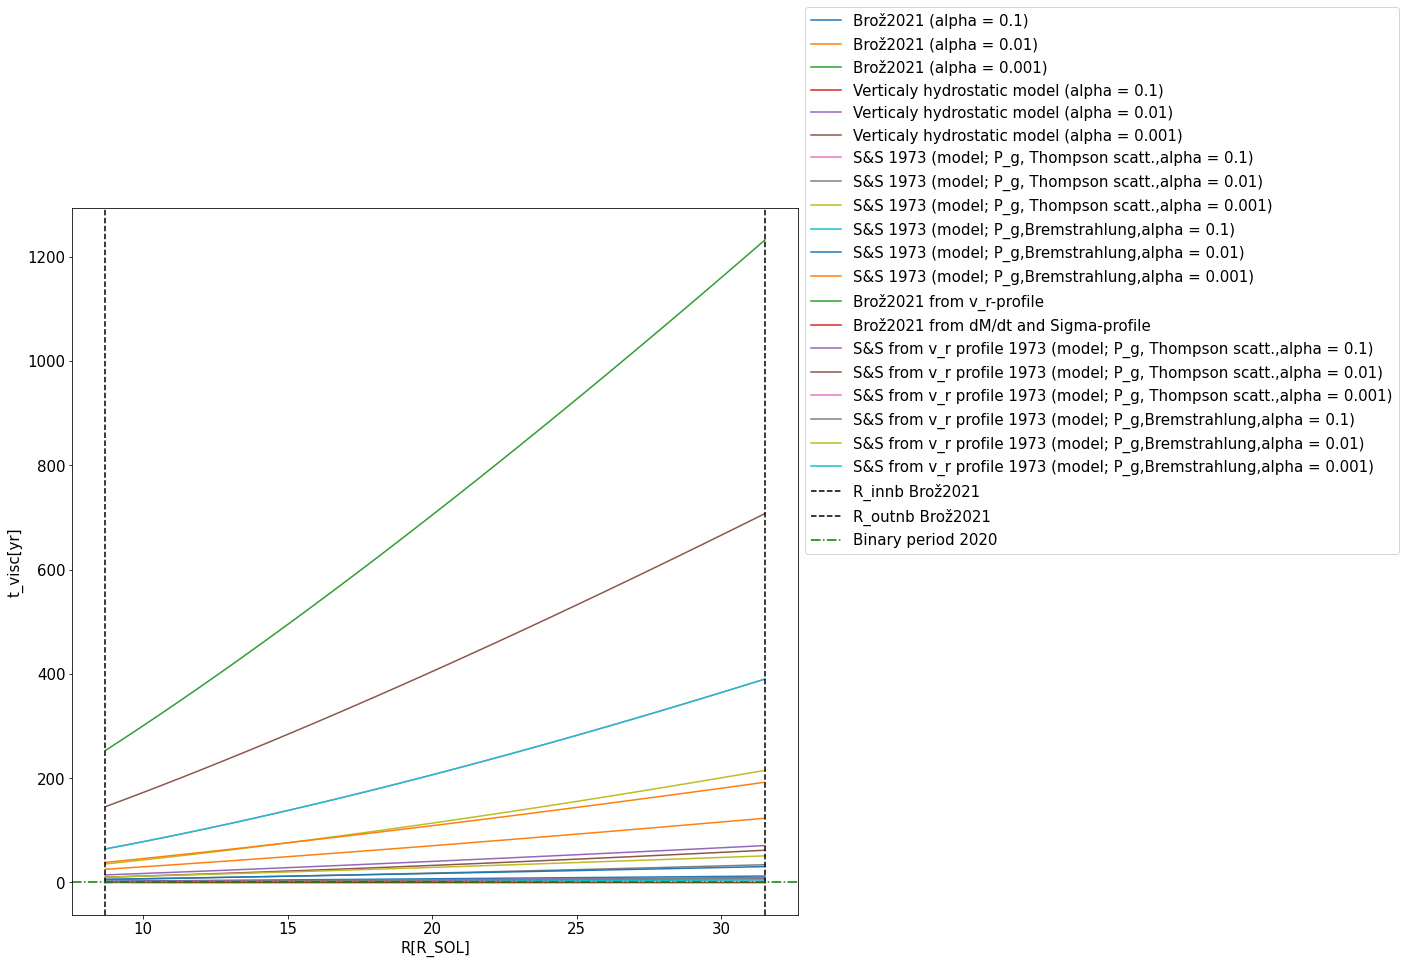

In [12]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae1,label = "Brož2021 (alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae2,label = "Brož2021 (alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae3, label = "Brož2021 (alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_static_alphae1,label = "Verticaly hydrostatic model (alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_static_alphae2,label = "Verticaly hydrostatic model (alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_static_alphae3, label = "Verticaly hydrostatic model (alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae3,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.1)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.01)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_BROZ2021_VR,label = "Brož2021 from v_r-profile")
plt.plot(RR/RSOL2SI,tnu_Mdot, label = "Brož2021 from dM/dt and Sigma-profile")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.1)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.01)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

#print("Highest estimet",tnu_static_alphae3[-1])

A good sign is, that the highest estimates are for the lowest $\alpha$ = 0.001, this is in acordance with the logical assumption that a higher viscosity will lead to a faster evolution, due to a higher rate of angular momentum transfer. The highest estimet is for $H$ and $T$ profiles calculated from the conclusions of the Broz et al. 2021 paper with $\alpha$ = 0.001 and reaches almost $t_{\nu} =1232$ years at $R_{outnb}$. Second highest is for using the $T$- profile from the paper but assuming a hydrostatic equilibrium in the $z$ direction and mean molecular weight of 0.5 and a $\gamma$ of 1.4, again with a $\alpha$ = 0.001, it reaches around 707 years at $R_{outnb}$.

### alpha = 0.1

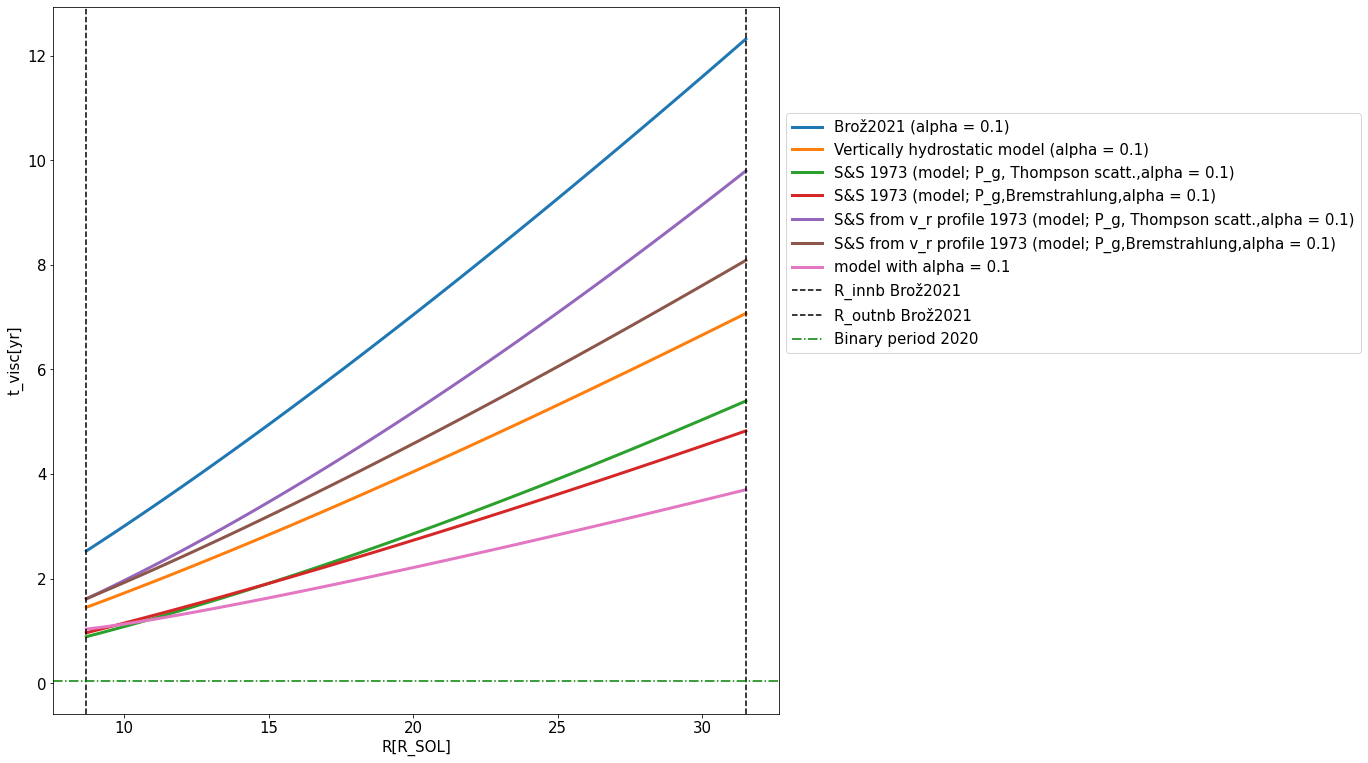

In [13]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae1,label = "Brož2021 (alpha = 0.1)", lw = 3)
plt.plot(RR/RSOL2SI,tnu_static_alphae1,label = "Vertically hydrostatic model (alpha = 0.1)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.1)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.1)", lw = 3)

#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.1)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.1)",lw=3)
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.1)",lw = 3)#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_new_alphae1,label = "model with alpha = 0.1",lw = 3)



plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

#print("Highest estimet",tnu_static_alphae3[-1])

plt.savefig('OKFinal_tnu_alphae-1.pdf', bbox_extra_artists=[lgd,], bbox_inches='tight')

### alpha = 0.01

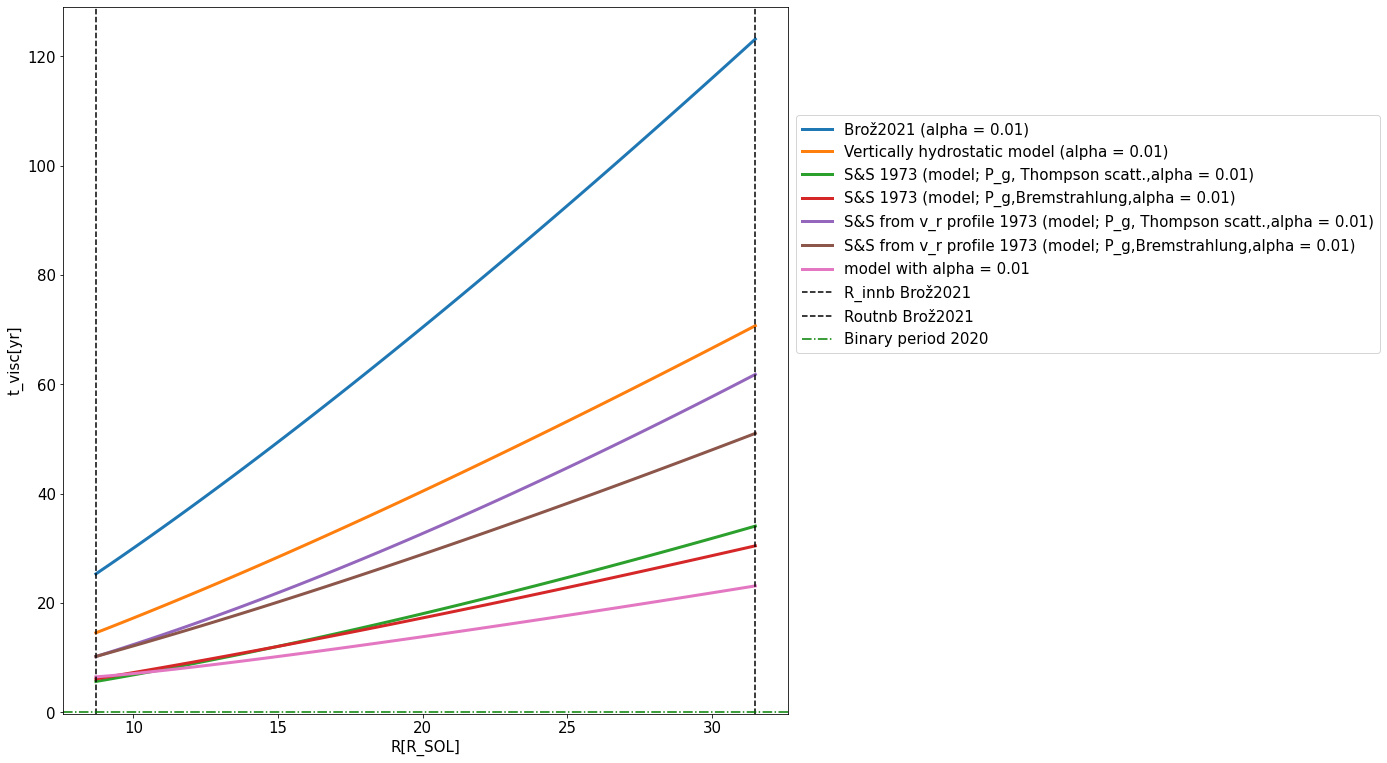

In [14]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae2,label = "Brož2021 (alpha = 0.01)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_static_alphae2,label = "Vertically hydrostatic model (alpha = 0.01)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.01)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.01)", lw = 3)
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.01)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.01)",lw = 3)
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.01)",lw = 3)
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_new_alphae2,label = "model with alpha = 0.01",lw = 3)


plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'Routnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

plt.savefig('OKFinal_tnu_alphae-2.pdf', bbox_extra_artists=[lgd,], bbox_inches='tight')

### alpha = 0.001

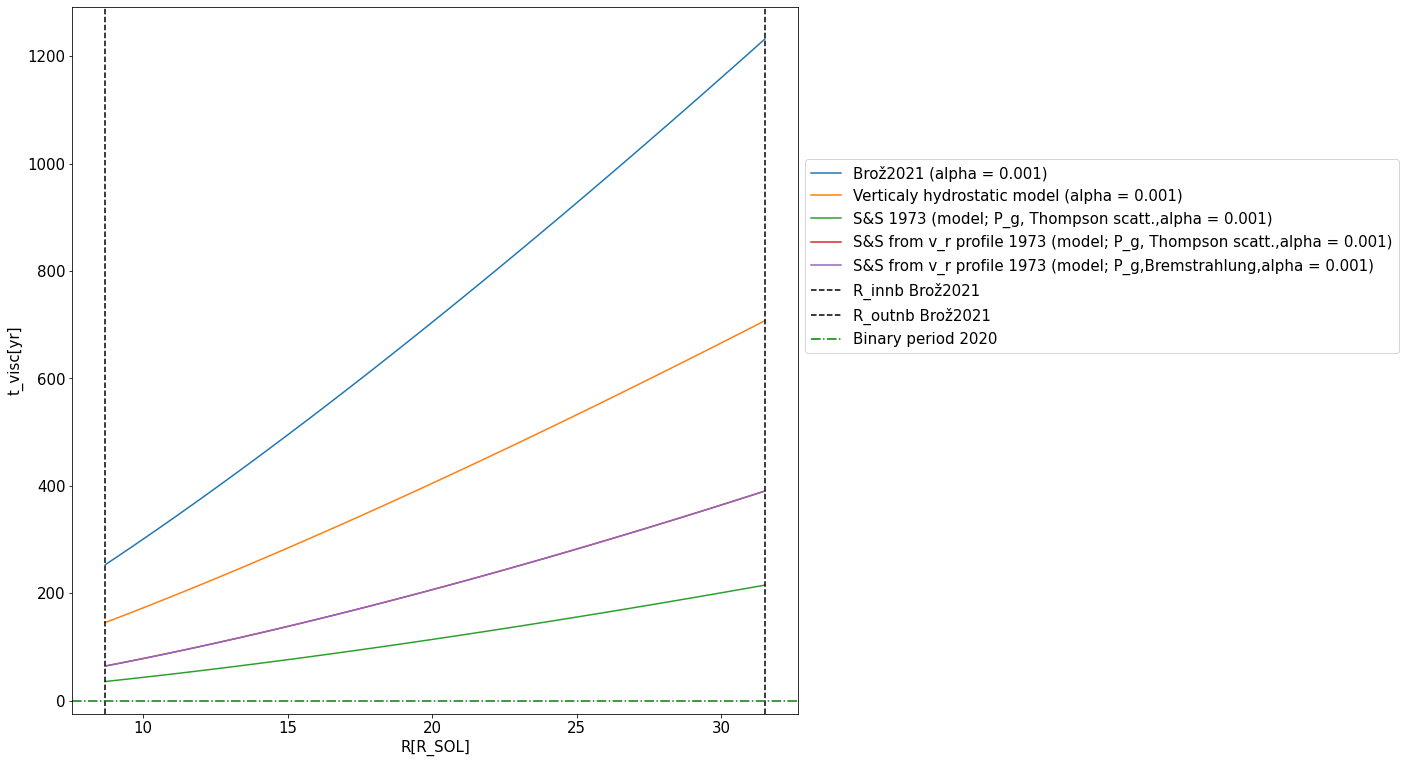

In [15]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae3,label = "Brož2021 (alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_static_alphae3,label = "Verticaly hydrostatic model (alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

### From v_r profile

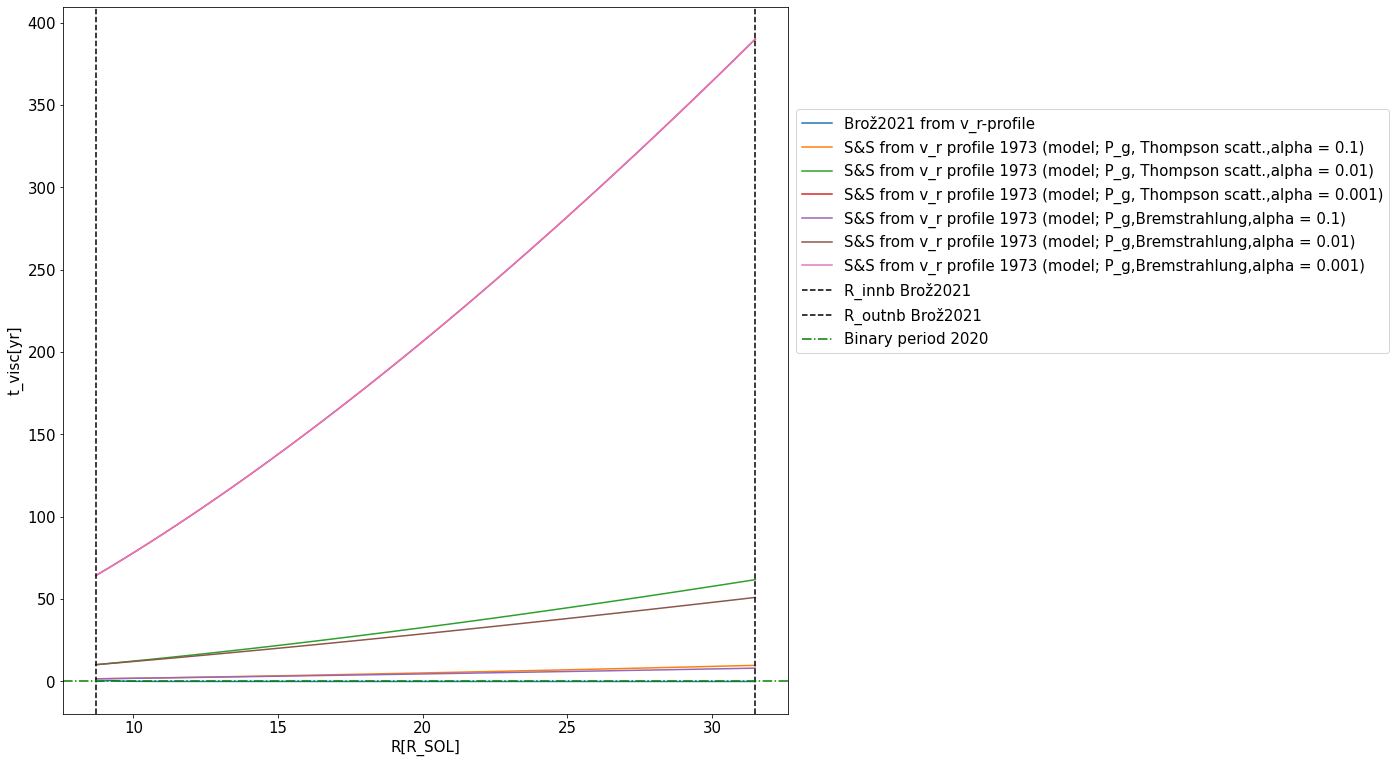

In [16]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_VR,label = "Brož2021 from v_r-profile")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.1)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.01)")
#plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

### From BROZ2021

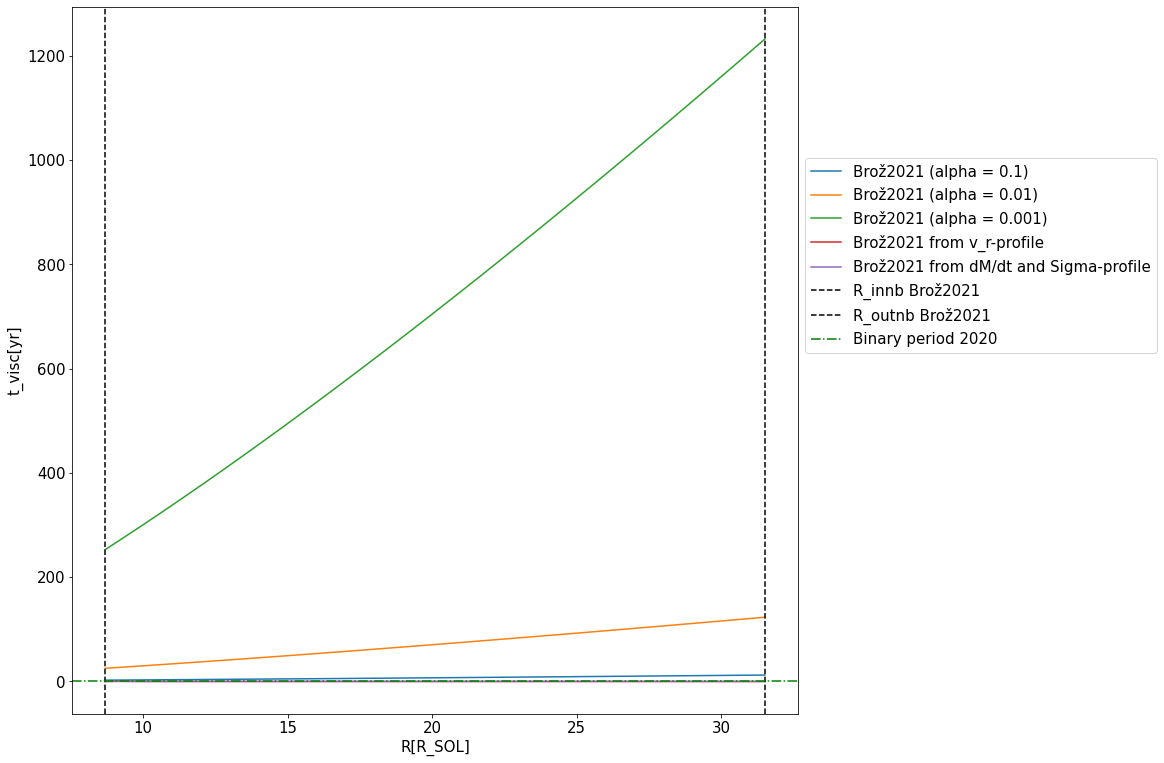

In [17]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae1,label = "Brož2021 (alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae2,label = "Brož2021 (alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_BROZ2021_alphae3, label = "Brož2021 (alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_BROZ2021_VR,label = "Brož2021 from v_r-profile")
plt.plot(RR/RSOL2SI,tnu_Mdot, label = "Brož2021 from dM/dt and Sigma-profile")

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(RR/RSOL2SI,tnu_BROZ2021_VR,label = "Broz2021 from v_r-profile")
plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'Rinnb')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'Routnb')
plt.xlabel("R[R_SOL]")
plt.ylabel("t_visc[yr]")
plt.ylim(0.0,0.1)
plt.legend()

plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(RR/RSOL2SI,tnu_Mdot, label = "Broz2021 from Mdot and Sigma-profile")
plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'Rinnb')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'Routnb')
plt.xlabel("R[R_SOL]")
plt.ylabel("t_visc[yr]")
plt.legend()

### From Shakura Sunayev with Thompson

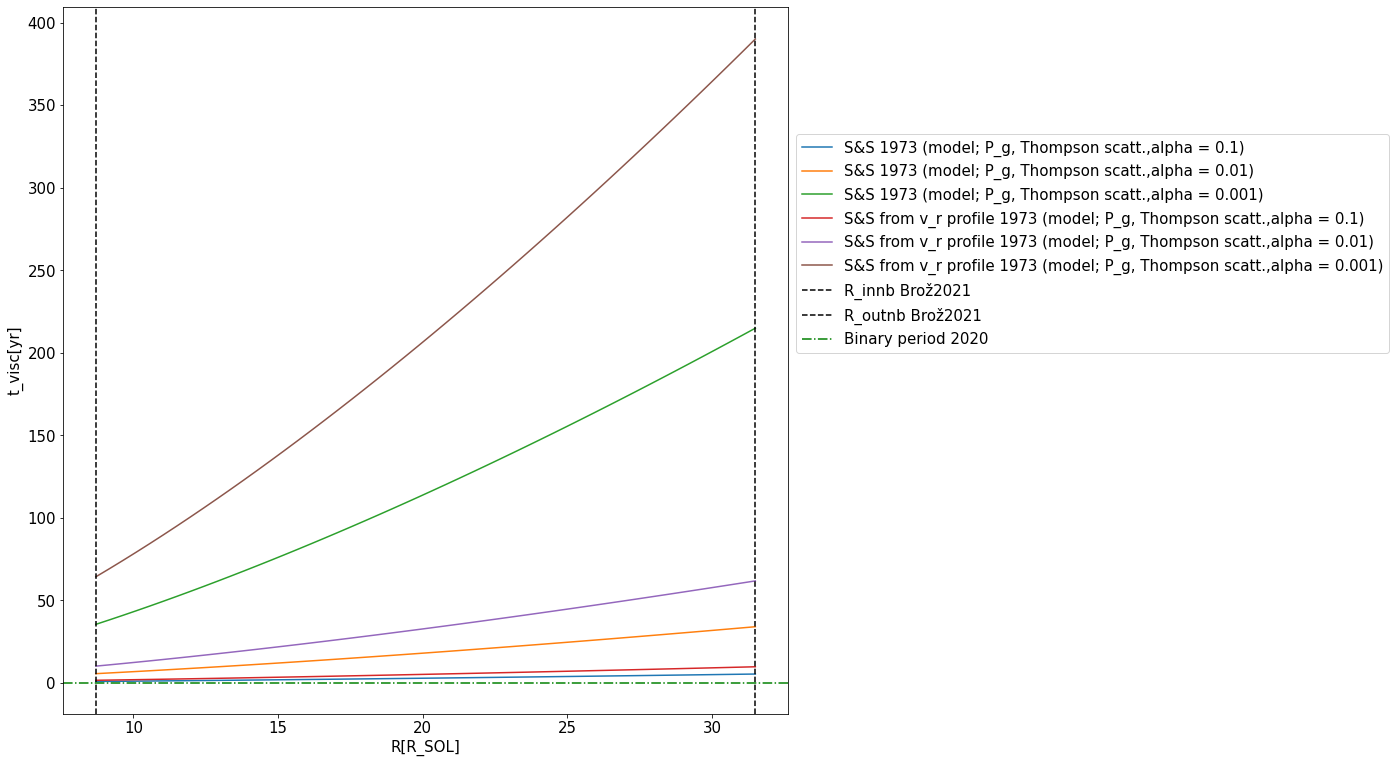

In [18]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3,label = "S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksun_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")


plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

# From Shakura Sunayev with Bremstrahlung

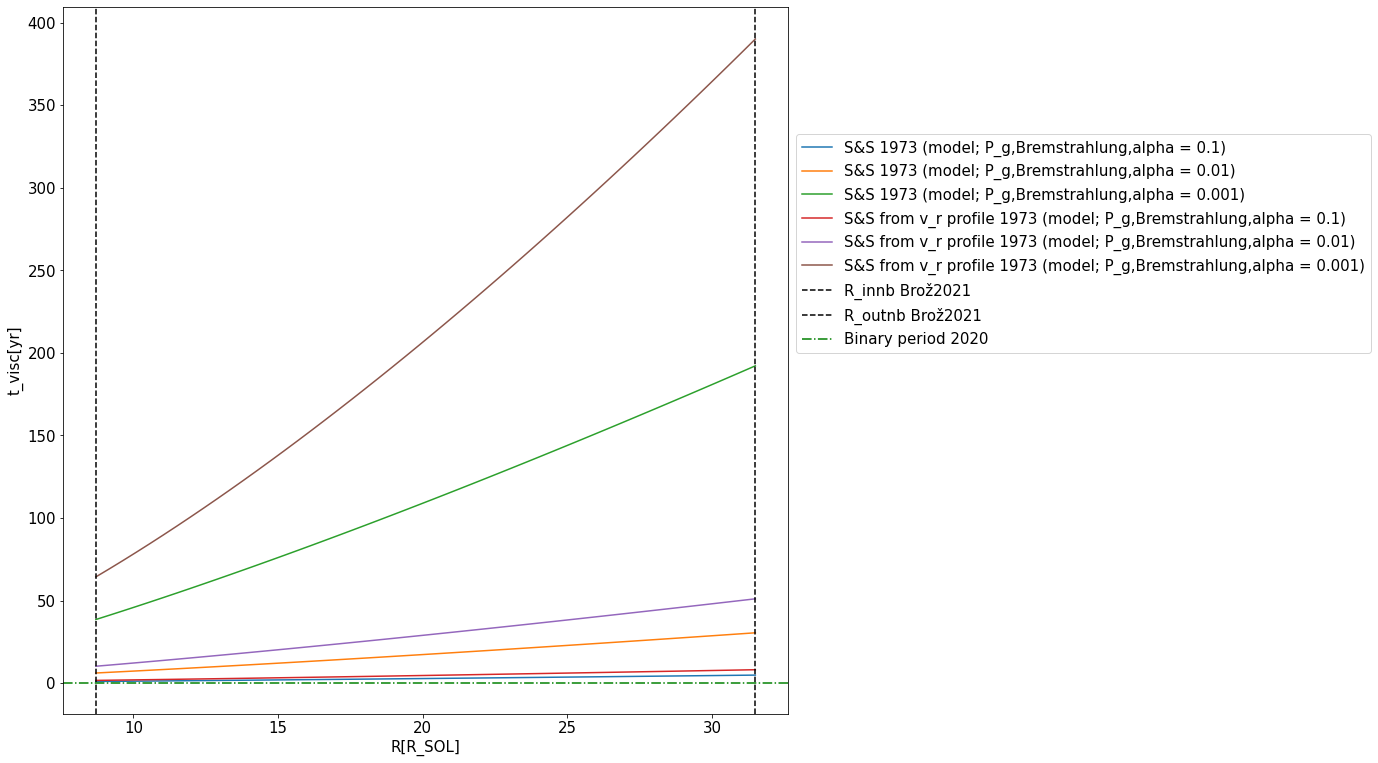

In [19]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae3,label = "S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunBrem_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")


plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

# From Shakura Sunayev Prad model

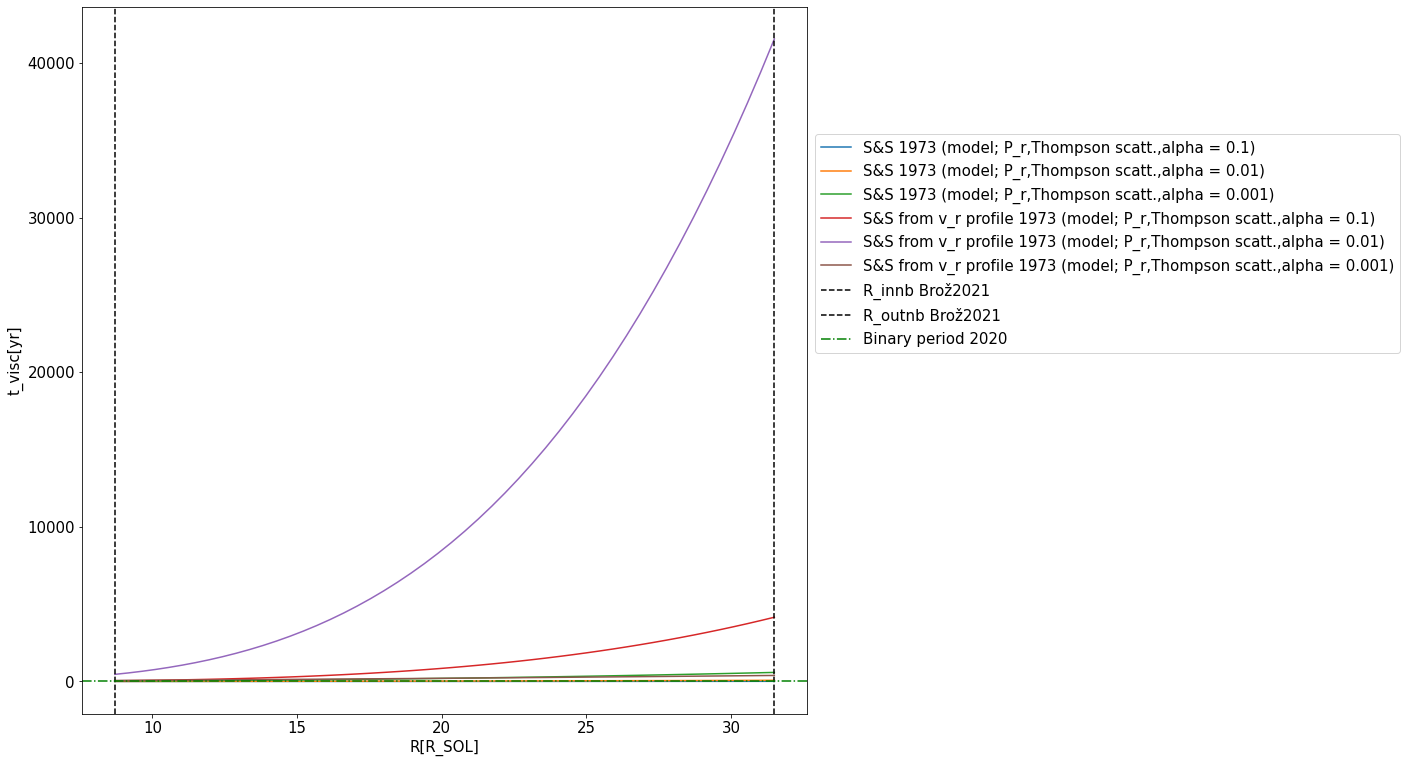

In [20]:
plt.rcParams['figure.figsize'] = [13, 13]

plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3,label = "S&S 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae1_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae2_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_shaksunPrad_alphae3_VR,label = "S&S from v_r profile 1973 (model; P_r,Thompson scatt.,alpha = 0.001)")

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

### From Static

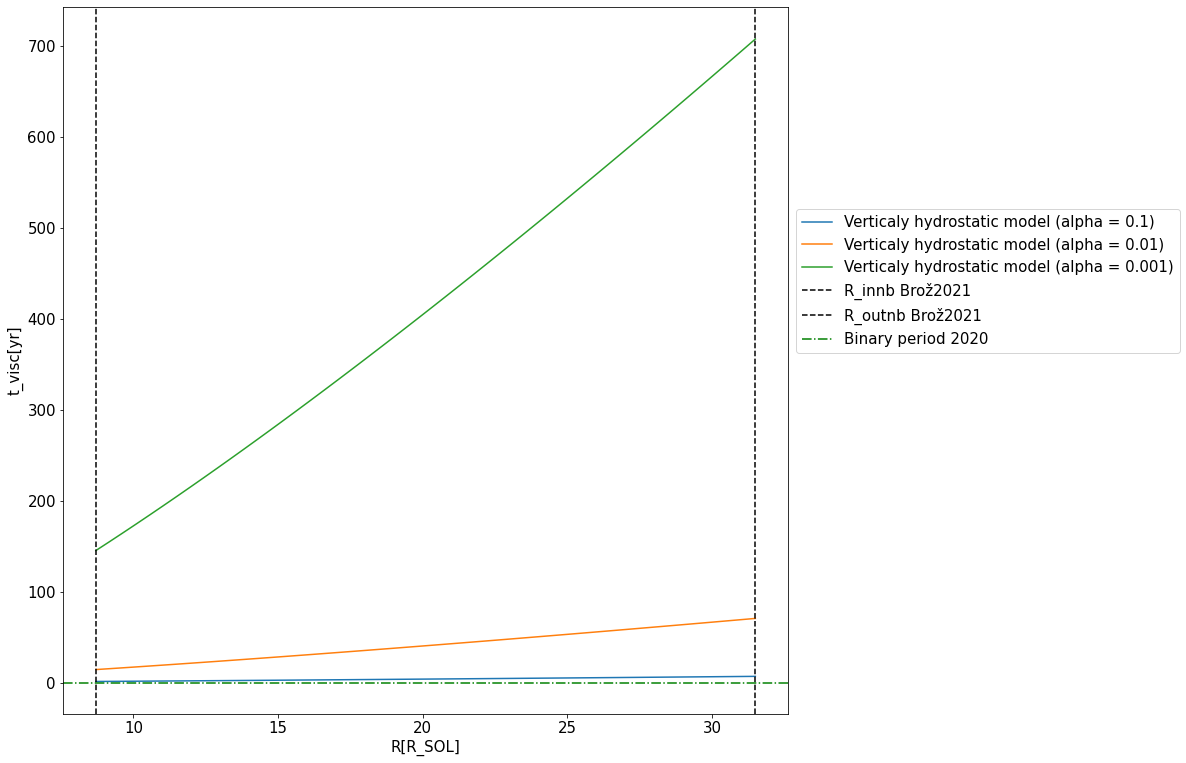

In [21]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tnu_static_alphae1,label = "Verticaly hydrostatic model (alpha = 0.1)")
plt.plot(RR/RSOL2SI,tnu_static_alphae2,label = "Verticaly hydrostatic model (alpha = 0.01)")
plt.plot(RR/RSOL2SI,tnu_static_alphae3, label = "Verticaly hydrostatic model (alpha = 0.001)")


plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/YR2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_visc[yr]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

## Dynamical Timescale and vertical timescale (Assuming Keplerian Tangetial velocisties)

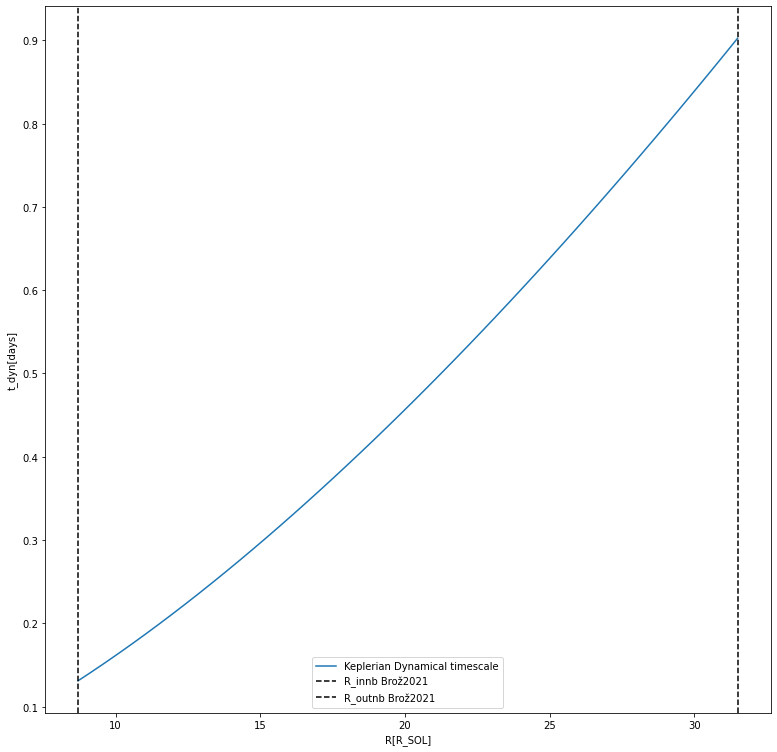

In [22]:
tdyn = list(map(lambda x: t_dyn_K(x)/DAYS2S,RR))

plt.plot(RR/RSOL2SI,tdyn,label = "Keplerian Dynamical timescale")
plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
#plt.axhline(y = BinPeriod/DAYS2S,linestyle='-.',color = "g", label =  "Binary period 2020")
plt.xlabel("R[R_SOL]")
plt.ylabel("t_dyn[days]")
plt.legend()

In [23]:
tz_BROZ2021 = list(map(lambda x,y: t_z(x,y)/DAYS2S,H_BROZ2021,cs_BROZ2021))
tz_static = list(map(lambda x,y: t_z(x,y)/DAYS2S,H_static,cs_static))
tz_shaksun_alphae1 = list(map(lambda x,y: t_z(x,y)/DAYS2S,Hshaksun_alphae1,csshaksun_alphae1))
tz_shaksun_alphae2 = list(map(lambda x,y: t_z(x,y)/DAYS2S,Hshaksun_alphae2,csshaksun_alphae2))
tz_shaksun_alphae3 = list(map(lambda x,y: t_z(x,y)/DAYS2S,Hshaksun_alphae3,csshaksun_alphae3))
tz_shaksunBrem_alphae1 = list(map(lambda x,y: t_z(x,y)/DAYS2S,HshaksunBrem_alphae1,csshaksunBrem_alphae1))
tz_shaksunBrem_alphae2 = list(map(lambda x,y: t_z(x,y)/DAYS2S,HshaksunBrem_alphae2,csshaksunBrem_alphae2))
tz_shaksunBrem_alphae3 = list(map(lambda x,y: t_z(x,y)/DAYS2S,HshaksunBrem_alphae3,csshaksunBrem_alphae3))
tz_shaksunPrad_alphae1 = list(map(lambda x,y: t_z(x*AU2SI,y)/DAYS2S,H_ss_prad,csshaksunPrad_alphae1))
tz_shaksunPrad_alphae2 = list(map(lambda x,y: t_z(x*AU2SI,y)/DAYS2S,H_ss_prad,csshaksunPrad_alphae2))
tz_shaksunPrad_alphae3 = list(map(lambda x,y: t_z(x*AU2SI,y)/DAYS2S,H_ss_prad,csshaksunPrad_alphae3))

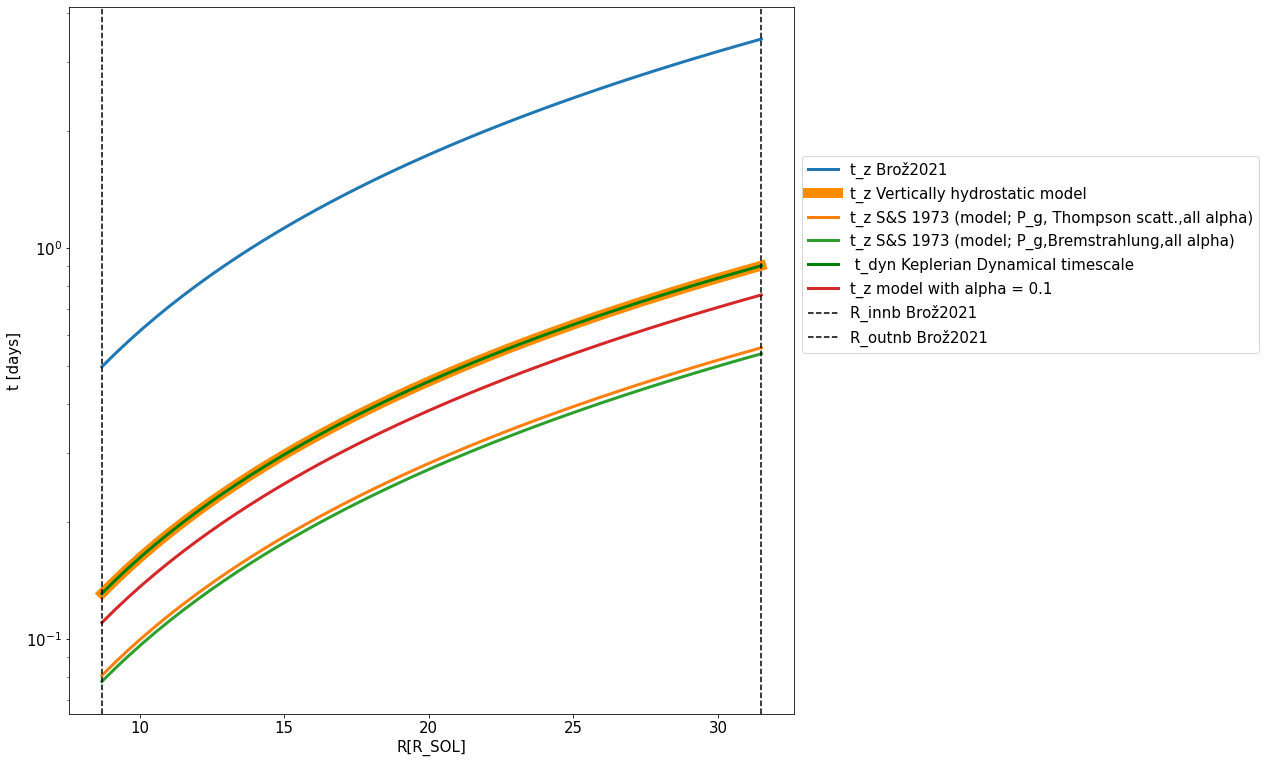

In [24]:
plt.plot(RR/RSOL2SI,tz_BROZ2021, label = "t_z Brož2021", lw=3)
plt.plot(RR/RSOL2SI,tz_static, label = "t_z Vertically hydrostatic model", lw = 10, c = 'darkorange')
plt.plot(RR/RSOL2SI,tz_shaksun_alphae1, label = "t_z S&S 1973 (model; P_g, Thompson scatt.,all alpha)", lw=3)
#plt.plot(RR/RSOL2SI,tz_shaksun_alphae2, label = "t_z S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.01)")
#plt.plot(RR/RSOL2SI,tz_shaksun_alphae3, label = "t_z S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tz_shaksunBrem_alphae1, label = "t_z S&S 1973 (model; P_g,Bremstrahlung,all alpha)", lw=3)
#plt.plot(RR/RSOL2SI,tz_shaksunBrem_alphae2, label = "t_z S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.01)")
#plt.plot(RR/RSOL2SI,tz_shaksunBrem_alphae3, label = "t_z S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.001)")
#plt.plot(RR/RSOL2SI,tz_shaksunPrad_alphae1, label = "t_z S&S 1973 (model; P_r, Thompson scatt.,all alpha)", lw=3)
#plt.plot(RR/RSOL2SI,tz_shaksunPrad_alphae2, label = "t_z S&S 1973 (model; P_r, Thompson scatt.,alpha = 0.01)")
#plt.plot(RR/RSOL2SI,tz_shaksunPrad_alphae3, label = "t_z S&S 1973 (model; P_r, Thompson scatt.,alpha = 0.001)")
plt.plot(RR/RSOL2SI,tdyn,label = " t_dyn Keplerian Dynamical timescale", lw=3, c = 'g')
plt.plot(RR/RSOL2SI,tz_new_alphae1, label = "t_z model with alpha = 0.1", lw=3)



plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
#plt.axhline(y = BinPeriod/DAYS2S,linestyle='-.',color = "g", label =  "Binary period 2020", lw=3)
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t [days]", fontsize = 15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))

plt.savefig('OKfinal_tz-tdyn_log.pdf', bbox_extra_artists=[lgd,], bbox_inches='tight')

All Shakura Sunayev t_z profiles are equal and overlap. t_z static and t_dyn overlap

## SOUNSPEED TIMESCALE

In [25]:
tcs_BROZ2021 = list(map(lambda x,y : t_cs_fromT(x,y,gamma_BROZ2021,MMW_BROZ2021)/DAYS2S,RR,Tbroz))
tcs_static = list(map(lambda x,y : t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,Tbroz))
tcsshaksun_alphae1 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,Tshaksun_alphae1))
tcsshaksun_alphae2 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,Tshaksun_alphae2))
tcsshaksun_alphae3 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,Tshaksun_alphae3))
tcsshaksunBrem_alphae1 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TshaksunBrem_alphae1))
tcsshaksunBrem_alphae2 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TshaksunBrem_alphae2))
tcsshaksunBrem_alphae3 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TshaksunBrem_alphae3))
tcsshaksunPrad_alphae1 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TshaksunPrad_alphae1))
tcsshaksunPrad_alphae2 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TshaksunPrad_alphae2))
tcsshaksunPrad_alphae3 = list(map(lambda x,y: t_cs_fromT(x,y,gamma_static,MMW_static)/DAYS2S,RR,TshaksunPrad_alphae3))

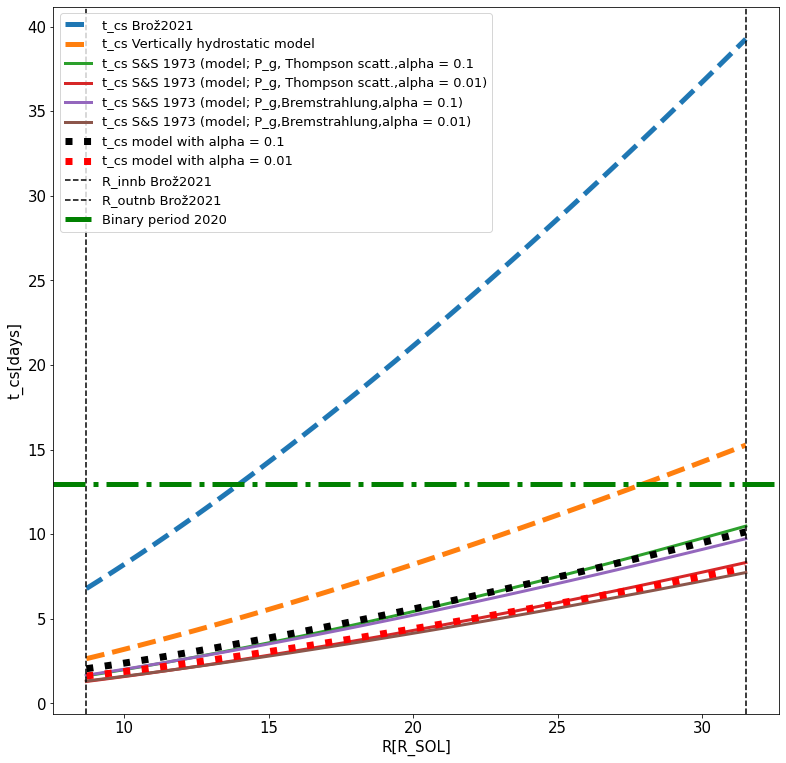

In [26]:
plt.rcParams['figure.figsize'] = [13, 13]
plt.plot(RR/RSOL2SI,tcs_BROZ2021,label = "t_cs Brož2021", lw = 5, ls ='--')
plt.plot(RR/RSOL2SI,tcs_static,label = "t_cs Vertically hydrostatic model", lw = 5, ls ='--')
plt.plot(RR/RSOL2SI,tcsshaksun_alphae1,label = "t_cs S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.1", lw = 3)
plt.plot(RR/RSOL2SI,tcsshaksun_alphae2,label = "t_cs S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.01)", lw = 3)
#plt.plot(RR/RSOL2SI,tcsshaksun_alphae3,label = "t_cs S&S 1973 (model; P_g, Thompson scatt.,alpha = 0.001)", lw = 3)
plt.plot(RR/RSOL2SI,tcsshaksunBrem_alphae1,label = "t_cs S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.1)", lw = 3)
plt.plot(RR/RSOL2SI,tcsshaksunBrem_alphae2,label = "t_cs S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.01)", lw = 3)
#plt.plot(RR/RSOL2SI,tcsshaksunBrem_alphae3,label = "t_cs S&S 1973 (model; P_g,Bremstrahlung,alpha = 0.001)", lw = 3)
#plt.plot(RR/RSOL2SI,tcsshaksunPrad_alphae1, label = "t_cs S&S 1973 (model; P_r, Thompson scatt.,alpha = 0.1)", lw = 3)
#plt.plot(RR/RSOL2SI,tcsshaksunPrad_alphae2, label = "t_cs S&S 1973 (model; P_r, Thompson scatt.,alpha = 0.01)", lw = 3)
#plt.plot(RR/RSOL2SI,tcsshaksunPrad_alphae3, label = "t_cs S&S 1973 (model; P_r, Thompson scatt.,alpha = 0.001)", lw = 3)
plt.plot(RR/RSOL2SI,tcs_New_alphae1, label = "t_cs model with alpha = 0.1", lw = 7, c = 'black',ls = ':')
plt.plot(RR/RSOL2SI,tcs_New_alphae2, label = "t_cs model with alpha = 0.01", lw = 7, c = 'r',ls = ':')




plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb Brož2021')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb Brož2021')
plt.axhline(y = BinPeriod/DAYS2S,linestyle='-.',color = "g", label =  "Binary period 2020",lw = 5)
plt.xlabel("R[R_SOL]", fontsize = 15)
plt.ylabel("t_cs[days]", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=13)

plt.savefig('OKfinal_tcs.pdf')